<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/project_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

In [46]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [47]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.set_xlabel('Time (days)')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [48]:
""" gamma is a list of 1000 random number in (0,1) """

import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [49]:
""" beta is twice of each of 1000 gamma values """
beta = []
for i in range(1000):
  beta.append(2*gamma[i])  

In [50]:
""" P, Q, M are the list of S, I, R respectievely calculated for 100 days for each of  1000 sets of parameter (beta,gamma)."""
    
P = []
Q = []
M  = []
for i in range(1000): #Plotted for 2 sets
  N = 1000
  S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, I0, R0 # Initial conditions vector
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i]))
  S, I, R = ret.T
  P.append(S)
  Q.append(I)
  M.append(R)

  

In [51]:
beta_list = []
for i in range(1000):
  beta_list.append(beta[i])  
Beta = pd.DataFrame(beta_list)    

In [52]:
""" list to dataftrame """

S_value = pd.DataFrame(P)
I_value = pd.DataFrame(Q)
R_value = pd.DataFrame(M)

In [53]:
""" S_list, I_list, R_list are the list of S, I, R respectievely chosen for 1 random values of days for each of the rows and there are such 1000 rows, 
    hence, S_list, I_list, R_list is a list of 1000 items and each item itself list of 1 values 
    and S_next_list, I_next_list, R_next_list are list of S, I, R respectively for (day +1) value for each of 1 days for each of 1000 rows   """
S_list = []
S_next_list = []
I_list = []
I_next_list = []
R_list = []
R_next_list = []
for i in range(1000):
  p = sample(range(0, 99), 1)
  S_list.append(S_value[p].iloc[i].to_list())
  S_next_list.append(S_value[[x+1 for x in p]].iloc[i].to_list())
  I_list.append(I_value[p].iloc[i].to_list())
  I_next_list.append(I_value[[x+1 for x in p]].iloc[i].to_list())
  R_list.append(R_value[p].iloc[i].to_list())
  R_next_list.append(R_value[[x+1 for x in p]].iloc[i].to_list())
  


In [54]:
""" merging 1000 lists each of 1 items into a single list of 1000 item """

sus_list = []
for i in range(1000):
 sus_list = sus_list+S_list[i]

infected_list = []
for i in range(1000):
 infected_list = infected_list+I_list[i] 

recov_list = []
for i in range(1000):
 recov_list = recov_list+R_list[i]
  
susnext_list = []
for i in range(1000):
 susnext_list = susnext_list+S_next_list[i]

infectednext_list = []
for i in range(1000):
 infectednext_list = infectednext_list+I_next_list[i]  

recovnext_list = []
for i in range(1000):
 recovnext_list = recovnext_list+R_next_list[i]


In [55]:
df_1 = pd.DataFrame(sus_list)
df_2 = pd.DataFrame(infected_list)
df_3 = pd.DataFrame(recov_list)
df_4 = pd.DataFrame(susnext_list)
df_5 = pd.DataFrame(infectednext_list)
df_6 = pd.DataFrame(recovnext_list)


In [56]:
data = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6,Beta], axis=1)
data.columns = range(data.shape[1])
data

,0,1,2,3,4,5,6
0,233.006723,3.914955e+01,727.843730,227.959119,3.324665e+01,738.794230,0.606223
1,202.846348,6.574120e-04,797.152994,202.846156,3.750345e-04,797.153469,1.888893
2,208.359692,7.895858e+00,783.744450,207.814343,7.130818e+00,785.054839,0.349113
3,327.152301,1.146832e+02,558.164480,311.405235,1.057649e+02,582.829850,0.447531
4,334.057920,1.182219e+02,547.720193,316.763474,1.089368e+02,574.299709,0.467980
...,...,...,...,...,...,...,...
995,202.845900,-4.965886e-11,797.154100,202.845900,-4.854861e-11,797.154100,1.847754
996,204.587643,2.533197e+00,792.879159,204.102201,1.830838e+00,794.066960,1.098218
997,202.845900,-5.525952e-11,797.154100,202.845900,-5.410611e-11,797.154100,1.919608
998,202.845900,1.976803e-07,797.154100,202.845900,1.506052e-07,797.154100,0.923156


In [57]:
from sklearn import preprocessing
float_array = data[[0,1,2,3,4,5,6]].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)

In [58]:
data_scaled = pd.DataFrame(scaled_array)
data_scaled

,0,1,2,3,4,5,6
0,3.788315e-02,2.543410e-01,0.913053,3.154383e-02,2.159902e-01,0.926789,0.302502
1,5.636720e-07,4.270981e-06,0.999999,3.215654e-07,2.436452e-06,0.999999,0.945680
2,6.925534e-03,5.129665e-02,0.983178,6.240686e-03,4.632608e-02,0.984822,0.173578
3,1.561336e-01,7.450571e-01,0.700196,1.363575e-01,6.871124e-01,0.731135,0.222928
4,1.648073e-01,7.680466e-01,0.687094,1.430878e-01,7.077190e-01,0.720435,0.233182
...,...,...,...,...,...,...,...
995,8.273382e-13,2.768774e-12,1.000000,8.225087e-13,2.775539e-12,1.000000,0.925051
996,2.187697e-03,1.645731e-02,0.994637,1.577996e-03,1.189422e-02,0.996127,0.549207
997,8.588130e-13,2.732388e-12,1.000000,8.540391e-13,2.739434e-12,1.000000,0.961081
998,1.696923e-10,1.287352e-09,1.000000,1.293266e-10,9.815126e-10,1.000000,0.461424


In [59]:
X = data_scaled[[0,1,2,3,4,5]]
y = data_scaled[6]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

In [61]:
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
  
# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)

# predicting on test data-set
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)

# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.16582505900892275
R2 score of training set is 0.6637845024358332


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.1684276739352601
R2 score of test set is 0.643777757620482


In [88]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)

mse=mean_squared_error(y_train, y_pred_train)

print(np.sqrt(mse))

[18:40:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.14976757664713058


In [79]:
y_pred_test = xgb_model.predict(X_test)

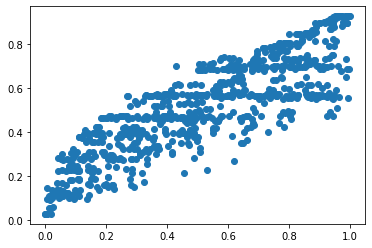

In [78]:
plt.scatter(y_train,y_pred_train)

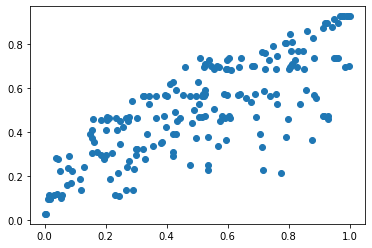

In [80]:
plt.scatter(y_test,y_pred_test)

In [75]:
SE_train = (y_train - y_pred_train)**2
MSE_train = SE_train.sum() /800
RMSE_train = np.sqrt(MSE_train)
RMSE_train

0.14976757664713058

In [81]:
SE_test = (y_test - y_pred_test)**2
MSE_test = SE_test.sum() /200
RMSE_test = np.sqrt(MSE_test)
RMSE_test

0.17413126504529086

In [82]:
train_list = []
for i in range(1,801):
  train_list.append(i)

In [83]:
test_list  = []
for i in range(1,201):
  test_list.append(i)

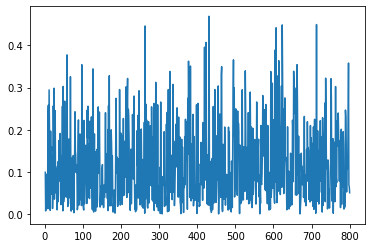

In [84]:
plt.figure(figsize=(6,4))
plt.plot(train_list,np.sqrt(SE_train))

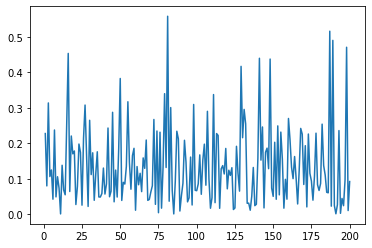

In [85]:
plt.figure(figsize=(6,4))
plt.plot(test_list,np.sqrt(SE_test))

In [86]:
# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.14976757664713058
R2 score of training set is 0.7257459736370444


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.17413126504529086
R2 score of test set is 0.6192432232786658
